In [71]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [74]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [75]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 32)                4128      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 238314 (930.91 KB)
Trainable params: 238314 (930.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [77]:
history = model.fit(X_train, Y_train, epochs = 100, validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 7s 4ms/step - loss: 1.3718 - accuracy: 0.6110 - val_loss: 0.7327 - val_accuracy: 0.7940
Epoch 2/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4753 - accuracy: 0.8848 - val_loss: 0.3247 - val_accuracy: 0.9311
Epoch 3/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2640 - accuracy: 0.9355 - val_loss: 0.2231 - val_accuracy: 0.9523
Epoch 4/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1722 - accuracy: 0.9552 - val_loss: 0.1554 - val_accuracy: 0.9624
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1398 - accuracy: 0.9632 - val_loss: 0.1396 - val_accuracy: 0.9631
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1159 - accuracy: 0.9701 - val_loss: 0.1568 - val_accuracy: 0.9625
Epoch 7/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1036 - accuracy: 0.9727 - val_loss: 0.1388 - val_ac

1500/1500 [==============================] - 6s 4ms/step - loss: 0.0363 - accuracy: 0.9945 - val_loss: 0.3670 - val_accuracy: 0.9727
Epoch 58/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0284 - accuracy: 0.9956 - val_loss: 0.3792 - val_accuracy: 0.9767
Epoch 59/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0256 - accuracy: 0.9960 - val_loss: 0.4403 - val_accuracy: 0.9742
Epoch 60/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0334 - accuracy: 0.9948 - val_loss: 0.5318 - val_accuracy: 0.9703
Epoch 61/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0398 - accuracy: 0.9950 - val_loss: 0.6311 - val_accuracy: 0.9732
Epoch 62/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0330 - accuracy: 0.9951 - val_loss: 0.3937 - val_accuracy: 0.9749
Epoch 63/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0411 - accuracy: 0.9939 - val_loss: 0.4954 - val_accuracy

In [78]:
y_pred = model.predict(X_test).argmax(axis = 1)

313/313 [==============================] - 1s 2ms/step


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.9764

Text(0, 0.5, 'Loss')

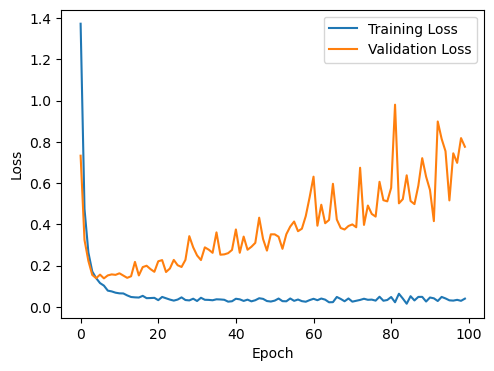

In [87]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

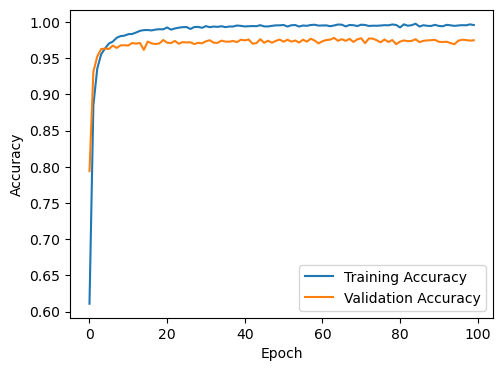

In [89]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

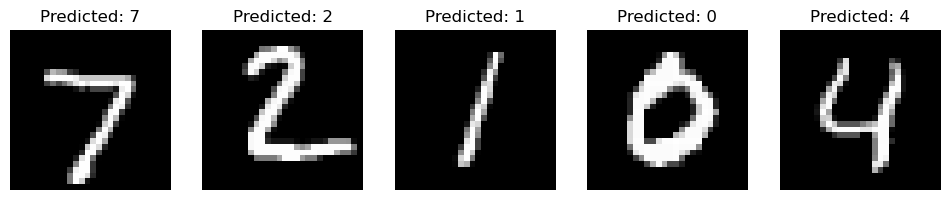

In [93]:
# Display some test images and their predictions
plt.figure(figsize=(12, 4))
for i in range(5):  # Display predictions for the first 5 test images
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}")
    plt.axis('off')